In [1]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth',200)
tweets = pd.read_pickle('cleaned_tweets_v1.pkl')
tweets.head()

,label,tweet,Cleaned_tweets,cleaned_tweets_without_stopwords,cleaned_tweets_without_stopwords1
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,f i n g e r p r i n t p r e g n a n c y t e s t a n d r o i d a p p s b e a u t i f u l c u t e h e a l t h i g e r s i p h o n e o n l y i p h o n e s i a i p h o n e,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,f i n a l l y a t r a n s p a r a n t s i l i c o n c a s e t h a n k s t o m y u n c l e y a y s o n y x p e r i a s s o n y e x p e r i a s,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this would you talk makememories unplug relax iphone smartphone wifi connect,w e l o v e t h i s w o u l d y o u g o t a l k m a k e m e m o r i e s u n p l u g r e l a x i p h o n e s m a r t p h o n e w i f i c o n n e c t,love talk makememories unplug relax iphone smartphone wifi connect
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george wa made that way iphone cute daventry home,i a m w i r e d i k n o w i a m g e o r g e i w a s m a d e t h a t w a y i p h o n e c u t e d a v e n t r y h o m e,wired know george way iphone cute daventry home
4,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk about question have unless pay them for their stupid support,w h a t a m a z i n g s e r v i c e a p p l e w i l l n o t e v e n t a l k t o m e a b o u t a q u e s t i o n i h a v e u n l e s s i p a y t h e m ...,amazing service apple talk question unless pay stupid support


In [2]:
tweets.shape

(7920, 5)

In [3]:
positive_tweets = tweets[tweets.label==1]
positive_tweets

,label,tweet,Cleaned_tweets,cleaned_tweets_without_stopwords,cleaned_tweets_without_stopwords1
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,f i n g e r p r i n t p r e g n a n c y t e s t a n d r o i d a p p s b e a u t i f u l c u t e h e a l t h i g e r s i p h o n e o n l y i p h o n e s i a i p h o n e,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,f i n a l l y a t r a n s p a r a n t s i l i c o n c a s e t h a n k s t o m y u n c l e y a y s o n y x p e r i a s s o n y e x p e r i a s,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this would you talk makememories unplug relax iphone smartphone wifi connect,w e l o v e t h i s w o u l d y o u g o t a l k m a k e m e m o r i e s u n p l u g r e l a x i p h o n e s m a r t p h o n e w i f i c o n n e c t,love talk makememories unplug relax iphone smartphone wifi connect
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george wa made that way iphone cute daventry home,i a m w i r e d i k n o w i a m g e o r g e i w a s m a d e t h a t w a y i p h o n e c u t e d a v e n t r y h o m e,wired know george way iphone cute daventry home
6,1,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/,happy for instapic instadaily sony xperia xperiaz,h a p p y f o r u s i n s t a p i c i n s t a d a i l y u s s o n y x p e r i a x p e r i a z,happy instapic instadaily sony xperia xperiaz
...,...,...,...,...,...
7915,1,Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/5spiNsJ_c9/,live out loud lol liveoutloud selfie smile sony music headphone,l i v e o u t l o u d l o l l i v e o u t l o u d s e l f i e s m i l e s o n y m u s i c h e a d p h o n e s,live loud lol liveoutloud selfie smile sony music headphone
7916,1,"We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life February 23, 2017 at 0…",would like wish you amazing day make every minute count tl today iphone accessory news life february,w e w o u l d l i k e t o w i s h y o u a n a m a z i n g d a y m a k e e v e r y m i n u t e c o u n t t l s t o d a y i p h o n e a c c e s s o r i e s n e w s ...,like wish amazing day make minute count tl today iphone accessory news life february
7917,1,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!,helping lovely year old neighbor with her ipad this morning ha just made realise that not actually need pad,h e l p i n g m y l o v e l y y e a r o l d n e i g h b o r w i t h h e r i p a d t h i s m o r n i n g h a s j u s t m a d e m e r e a l i s e t h a t i ...,helping lovely year old neighbor ipad morning realise actually need pad
7918,1,"Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/",finally got smart pocket wifi stay connected anytime anywhere ipad and samsung gadget,f i n a l l y g o t m y s m a r t p o c k e t w i f i s t a y c o n n e c t e d a n y t i m e a n y w h e r e i p a d a n d s a m s u n g s g a d g e t,finally got smart pocket wifi stay connected anytime ipad samsung gadget


In [4]:
positive_tweets.columns

Index(['label', 'tweet', 'Cleaned_tweets', 'cleaned_tweets_without_stopwords',
       'cleaned_tweets_without_stopwords1'],
      dtype='object')

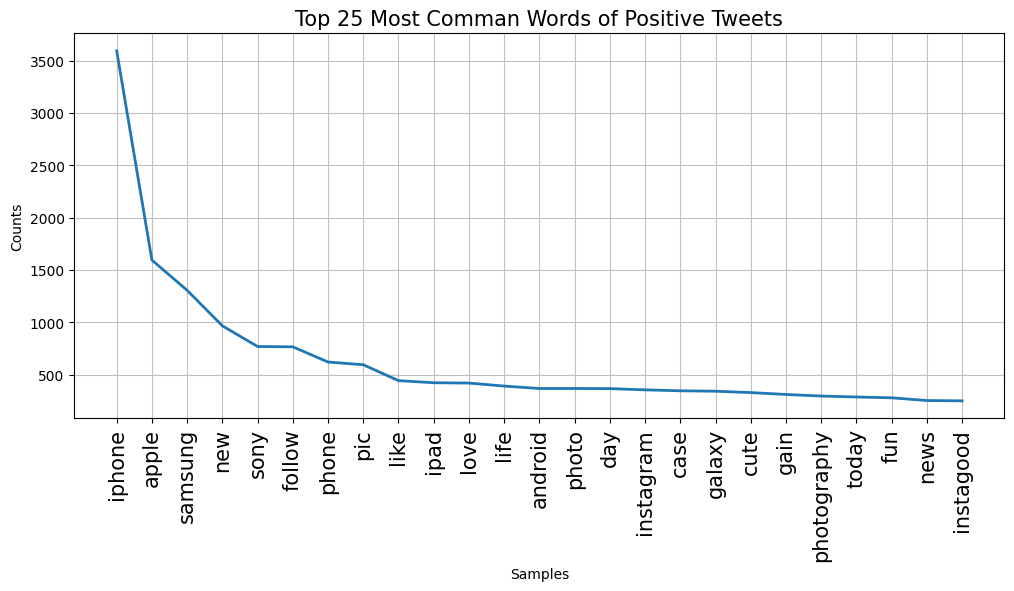

In [5]:
positive_vocab = [token for tweet in positive_tweets.cleaned_tweets_without_stopwords1 for token in tweet.split()]

import matplotlib.pyplot as plt
positive_freq = nltk.FreqDist(positive_vocab)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Comman Words of Positive Tweets", fontsize=15)
plt.xticks(fontsize=15)
positive_freq.plot(25, cumulative=False)
plt.show()

In [6]:
from wordcloud import WordCloud

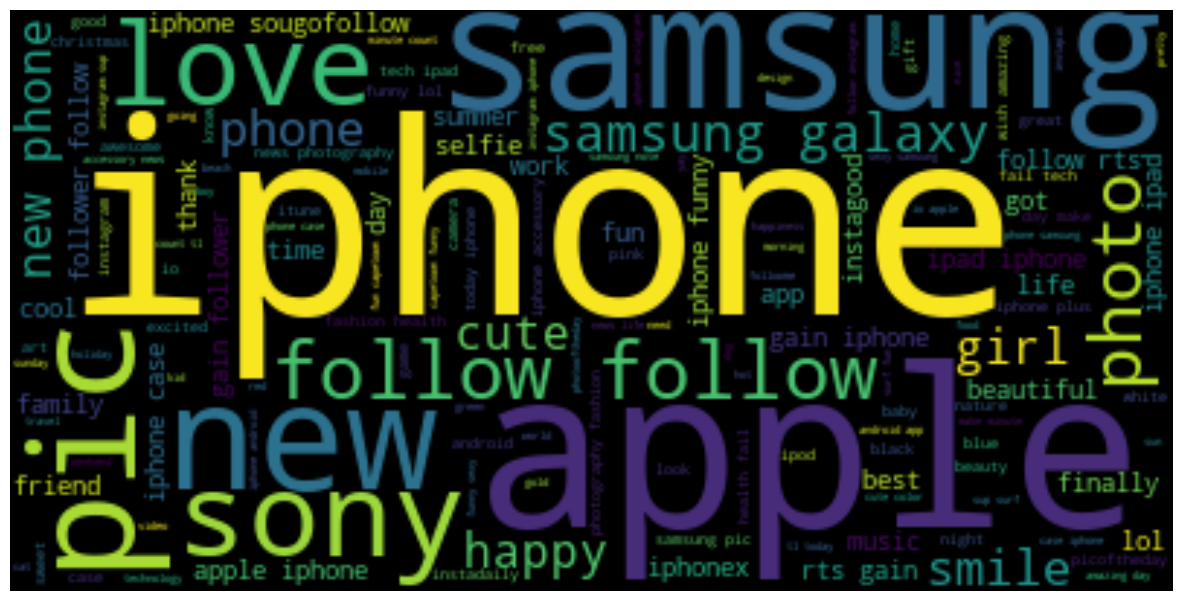

In [7]:
p_vocab = ' '.join(map(str,positive_vocab))
positive_wordcloud = WordCloud()
positive_wordcloud.generate(p_vocab)
plt.figure(figsize=(15,8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Extraction : BAG OF WORDS (BOW)

In [9]:
# splitting the data into ind and dep variable
x = tweets['cleaned_tweets_without_stopwords1']
y = tweets['label']

In [10]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42,stratify=y) 

# Applying Bag Of Words approach before building algorithm

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_train = cv.fit_transform(x_train)
cv_test = cv.transform(x_test)

In [13]:
cv_train.shape

(6336, 13269)

In [14]:
cv_test.shape

(1584, 13269)

In [15]:
cv_train

<6336x13269 sparse matrix of type '<class 'numpy.int64'>'
	with 62694 stored elements in Compressed Sparse Row format>

In [16]:
df = pd.DataFrame(cv_train.todense(), columns = cv.get_feature_names_out())
df.head(10)

,aag,aah,aalborg,aapl,aarhus,aaron,aarp,aarrrggghhhh,aashamsakal,aayp,...,zunehd,zunjndm,zurich,zwckahsl,zwcn,zxw,zxzh,zyrithxkuv,zzita,zzjvgtyaxl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Actual Model building - LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(cv_train, y_train)

LogisticRegression()

In [19]:
LR.predict(cv_train)[:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [20]:
LR.score(cv_train, y_train)

0.9730113636363636

In [21]:
LR.score(cv_test, y_test)

0.8598484848484849

# TF-IDF Logistic Model

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer()
TFIDF_train = TFIDF.fit_transform(x_train)
TFIDF_test = TFIDF.transform(x_test)

In [24]:
TFIDF_test

<1584x13269 sparse matrix of type '<class 'numpy.float64'>'
	with 13352 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(TFIDF_train, y_train)

LogisticRegression()

In [26]:
LR.predict(TFIDF_train)[:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [27]:
LR.score(TFIDF_train, y_train)

0.9221906565656566

In [28]:
LR.score(TFIDF_test, y_test)

0.8440656565656566

# Model Building using Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
TFIDF= TfidfVectorizer(max_df=0.5, min_df=10, max_features=None)
LR = LogisticRegression()
TFIDF_pipeline = Pipeline([('TFIDF', TFIDF),('LR', LR)])


In [31]:
TFIDF_pipeline

Pipeline(steps=[('TFIDF', TfidfVectorizer(max_df=0.5, min_df=10)),
                ('LR', LogisticRegression())])

In [32]:
# Task - please use different machine learning method 

In [33]:
# MultiLayer Perceptron method - DNN

# n-grams

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer(ngram_range=(1, 3))
TFIDF_train = TFIDF.fit_transform(x_train)
TFIDF_test = TFIDF.transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(TFIDF_train, y_train)

LogisticRegression()

In [37]:
LR.score(TFIDF_train, y_train)

0.9149305555555556

In [38]:
LR.score(TFIDF_test, y_test)

0.8434343434343434

# Word2Vec

In [76]:
tweets.head()

,label,tweet,Cleaned_tweets,cleaned_tweets_without_stopwords,cleaned_tweets_without_stopwords1
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,f i n g e r p r i n t p r e g n a n c y t e s t a n d r o i d a p p s b e a u t i f u l c u t e h e a l t h i g e r s i p h o n e o n l y i p h o n e s i a i p h o n e,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,f i n a l l y a t r a n s p a r a n t s i l i c o n c a s e t h a n k s t o m y u n c l e y a y s o n y x p e r i a s s o n y e x p e r i a s,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this would you talk makememories unplug relax iphone smartphone wifi connect,w e l o v e t h i s w o u l d y o u g o t a l k m a k e m e m o r i e s u n p l u g r e l a x i p h o n e s m a r t p h o n e w i f i c o n n e c t,love talk makememories unplug relax iphone smartphone wifi connect
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george wa made that way iphone cute daventry home,i a m w i r e d i k n o w i a m g e o r g e i w a s m a d e t h a t w a y i p h o n e c u t e d a v e n t r y h o m e,wired know george way iphone cute daventry home
4,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk about question have unless pay them for their stupid support,w h a t a m a z i n g s e r v i c e a p p l e w i l l n o t e v e n t a l k t o m e a b o u t a q u e s t i o n i h a v e u n l e s s i p a y t h e m ...,amazing service apple talk question unless pay stupid support


In [78]:
tweets.columns

Index(['label', 'tweet', 'Cleaned_tweets', 'cleaned_tweets_without_stopwords',
       'cleaned_tweets_without_stopwords1'],
      dtype='object')

In [80]:
tweets = tweets.drop(['tweet', 'Cleaned_tweets', 'cleaned_tweets_without_stopwords'], axis=1)

In [82]:
tweets

,label,cleaned_tweets_without_stopwords1
0,1,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,love talk makememories unplug relax iphone smartphone wifi connect
3,1,wired know george way iphone cute daventry home
4,0,amazing service apple talk question unless pay stupid support
...,...,...
7915,1,live loud lol liveoutloud selfie smile sony music headphone
7916,1,like wish amazing day make minute count tl today iphone accessory news life february
7917,1,helping lovely year old neighbor ipad morning realise actually need pad
7918,1,finally got smart pocket wifi stay connected anytime ipad samsung gadget


In [96]:
x = tweets['cleaned_tweets_without_stopwords1']
y = tweets['label']

In [98]:
x.head()

0    fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1                         finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2                                 love talk makememories unplug relax iphone smartphone wifi connect
3                                                    wired know george way iphone cute daventry home
4                                      amazing service apple talk question unless pay stupid support
Name: cleaned_tweets_without_stopwords1, dtype: object

In [100]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: label, dtype: int64

In [102]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42,stratify=y) 

In [110]:
tweets

,label,cleaned_tweets_without_stopwords1
0,1,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,love talk makememories unplug relax iphone smartphone wifi connect
3,1,wired know george way iphone cute daventry home
4,0,amazing service apple talk question unless pay stupid support
...,...,...
7915,1,live loud lol liveoutloud selfie smile sony music headphone
7916,1,like wish amazing day make minute count tl today iphone accessory news life february
7917,1,helping lovely year old neighbor ipad morning realise actually need pad
7918,1,finally got smart pocket wifi stay connected anytime ipad samsung gadget


In [112]:
tweets['tokenised_sentences'] = tweets['cleaned_tweets_without_stopwords1'].apply(lambda x:x.split())
tweets

,label,cleaned_tweets_without_stopwords1,tokenised_sentences
0,1,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,"[fingerprint, pregnancy, test, android, apps, beautiful, cute, health, igers, iphoneonly, iphonesia, iphone]"
1,1,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,"[finally, transparant, silicon, case, thanks, uncle, yay, sony, xperia, sonyexperias]"
2,1,love talk makememories unplug relax iphone smartphone wifi connect,"[love, talk, makememories, unplug, relax, iphone, smartphone, wifi, connect]"
3,1,wired know george way iphone cute daventry home,"[wired, know, george, way, iphone, cute, daventry, home]"
4,0,amazing service apple talk question unless pay stupid support,"[amazing, service, apple, talk, question, unless, pay, stupid, support]"
...,...,...,...
7915,1,live loud lol liveoutloud selfie smile sony music headphone,"[live, loud, lol, liveoutloud, selfie, smile, sony, music, headphone]"
7916,1,like wish amazing day make minute count tl today iphone accessory news life february,"[like, wish, amazing, day, make, minute, count, tl, today, iphone, accessory, news, life, february]"
7917,1,helping lovely year old neighbor ipad morning realise actually need pad,"[helping, lovely, year, old, neighbor, ipad, morning, realise, actually, need, pad]"
7918,1,finally got smart pocket wifi stay connected anytime ipad samsung gadget,"[finally, got, smart, pocket, wifi, stay, connected, anytime, ipad, samsung, gadget]"


In [84]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Word2Vec - Feature Extraction/Transformation method

In [94]:
from gensim.models import Word2Vec

In [114]:
import time
from time import time
%time word2vec_vec = Word2Vec(tweets['tokenised_sentences'],vector_size=300,min_count=1)
print(word2vec_vec)

CPU times: total: 1.61 s
Wall time: 928 ms
Word2Vec<vocab=15363, vector_size=300, alpha=0.025>


In [144]:
15363 * 300

4608900

In [116]:
word2vec_vec.wv

In [118]:
word2vec_vec.corpus_count

7920

In [120]:
word2vec_vec.wv.index_to_key

['iphone',
 'apple',
 'samsung',
 'new',
 'phone',
 'sony',
 'follow',
 'pic',
 'like',
 'ipad',
 'love',
 'day',
 'life',
 'android',
 'io',
 'photo',
 'galaxy',
 'instagram',
 'case',
 'cute',
 'today',
 'gain',
 'photography',
 'got',
 'fun',
 'news',
 'music',
 'instagood',
 'time',
 'app',
 'happy',
 'smile',
 'work',
 'beautiful',
 'funny',
 'girl',
 'birthday',
 'lol',
 'fashion',
 'game',
 'make',
 'ipod',
 'tech',
 'itunes',
 'iphonex',
 'friend',
 'photooftheday',
 'finally',
 'update',
 'good',
 'amazing',
 'apps',
 'note',
 'want',
 'mac',
 'sougofollow',
 'thanks',
 'gift',
 'follower',
 'selfie',
 'sale',
 'fail',
 'free',
 'baby',
 'rts',
 'year',
 'fuck',
 'igers',
 'home',
 'hate',
 'look',
 'family',
 'camera',
 'cool',
 'iphonesia',
 'best',
 'iphoneonly',
 'art',
 'going',
 'suck',
 'charger',
 'fucking',
 'christmas',
 'need',
 'summer',
 'smartphone',
 'picoftheday',
 'health',
 'white',
 'live',
 'mobile',
 'thing',
 'know',
 'hour',
 'product',
 'color',
 'plus'

In [122]:
word2vec_vec.vector_size

300

In [128]:
word2vec_vec.wv

In [138]:
import numpy as np
def get_document_vector(doc, model):
    token = [word for word in doc if word in model]
    if token:
        doc_embedding = np.mean(model[token], axis=0)
    else:
        doc_embedding = np.zeros(model.vector_size)
    return doc_embedding

In [140]:
tweets['w2v_embedding'] = tweets['tokenised_sentences'].apply(lambda doc:get_document_vector(doc,word2vec_vec.wv))

In [142]:
tweets

,label,cleaned_tweets_without_stopwords1,tokenised_sentences,w2v_embedding
0,1,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,"[fingerprint, pregnancy, test, android, apps, beautiful, cute, health, igers, iphoneonly, iphonesia, iphone]","[-0.07632726, 0.45443794, 0.07157184, 0.13172331, 0.020774327, -0.3210872, 0.31911775, 0.8420162, 0.074701466, -0.28484014, 0.04031476, -0.38311878, 0.06094885, 0.10266712, -0.1353354, -0.17999013..."
1,1,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,"[finally, transparant, silicon, case, thanks, uncle, yay, sony, xperia, sonyexperias]","[-0.03813872, 0.28775847, 0.08763966, 0.102319345, 0.019964693, -0.24495415, 0.1830291, 0.5846326, 0.08054948, -0.13072982, 0.0024300313, -0.26286775, 0.008160501, 0.07545312, -0.086793005, -0.110..."
2,1,love talk makememories unplug relax iphone smartphone wifi connect,"[love, talk, makememories, unplug, relax, iphone, smartphone, wifi, connect]","[-0.036439437, 0.25226742, 0.05576408, 0.08425082, 0.020341074, -0.20072186, 0.17907733, 0.5125526, 0.05413121, -0.14901176, 0.015743794, -0.2367194, 0.023107953, 0.06423214, -0.077732325, -0.1063..."
3,1,wired know george way iphone cute daventry home,"[wired, know, george, way, iphone, cute, daventry, home]","[-0.046195347, 0.33252516, 0.06945247, 0.10937618, 0.02314352, -0.25908473, 0.23935634, 0.67644876, 0.064641185, -0.20791581, 0.025108859, -0.31168777, 0.04093777, 0.08704221, -0.100093596, -0.143..."
4,0,amazing service apple talk question unless pay stupid support,"[amazing, service, apple, talk, question, unless, pay, stupid, support]","[-0.030725727, 0.26828584, 0.07548924, 0.09342154, 0.02536564, -0.2315275, 0.18210548, 0.5432025, 0.07893122, -0.1286037, 0.007830833, -0.24556191, 0.009592586, 0.07246371, -0.072525576, -0.099675..."
...,...,...,...,...
7915,1,live loud lol liveoutloud selfie smile sony music headphone,"[live, loud, lol, liveoutloud, selfie, smile, sony, music, headphone]","[-0.07027442, 0.4907989, 0.11140641, 0.15051569, 0.033821866, -0.38510734, 0.329265, 0.9370775, 0.11014466, -0.25829098, 0.019794067, -0.4332446, 0.03665723, 0.1169532, -0.14666757, -0.18362558, 0..."
7916,1,like wish amazing day make minute count tl today iphone accessory news life february,"[like, wish, amazing, day, make, minute, count, tl, today, iphone, accessory, news, life, february]","[-0.05429363, 0.48477954, 0.12205468, 0.16581526, 0.0425341, -0.41694066, 0.33374292, 0.90014994, 0.18342541, -0.2094156, 0.014171508, -0.41145366, 0.008320755, 0.11835535, -0.090886354, -0.134784..."
7917,1,helping lovely year old neighbor ipad morning realise actually need pad,"[helping, lovely, year, old, neighbor, ipad, morning, realise, actually, need, pad]","[-0.036743775, 0.24045244, 0.050290033, 0.06964912, 0.017046146, -0.18922192, 0.16058682, 0.4425563, 0.051724616, -0.118984945, 0.008887241, -0.20641012, 0.015512533, 0.050525833, -0.073462315, -0..."
7918,1,finally got smart pocket wifi stay connected anytime ipad samsung gadget,"[finally, got, smart, pocket, wifi, stay, connected, anytime, ipad, samsung, gadget]","[-0.051917817, 0.32201597, 0.08134429, 0.09813985, 0.020300172, -0.260331, 0.20066729, 0.5819366, 0.08185928, -0.13529915, 0.0018582523, -0.26487517, 0.0019250438, 0.06801473, -0.097883254, -0.108..."


In [ ]:
# we have to do from scratch by using 

In [146]:
y

0       1
1       1
2       1
3       1
4       0
       ..
7915    1
7916    1
7917    1
7918    1
7919    1
Name: label, Length: 7920, dtype: int64